Logistic regression learning on titanic dataset . Classification problem where we have to identify if the person survived or deceased

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# this is semicleaned dataset we are using from kaggle
df=pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data analysis

In [4]:
nan_values=df.isnull().sum()
nan_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

we have null values in age cabin and embarked

<AxesSubplot:>

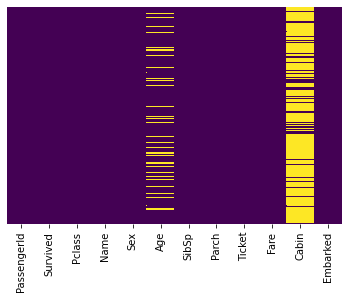

In [5]:
# using heatmap for visualisation 
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
# yticklabels are for y axis readings 
# cmap is for color how to represent true values
#cbar is used for intesity measurements 

so majority of cabin values are null so there's no need of this column

In [6]:
df.drop(['Cabin'],inplace=True,axis=1)
# inplace=True means it saves the changes in df also
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

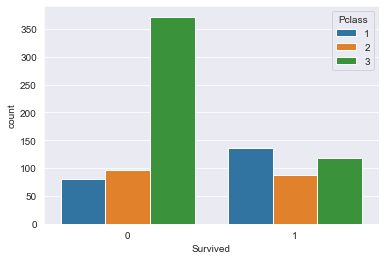

In [7]:
sns.set_style("darkgrid")
sns.countplot(x='Survived',data=df,hue='Pclass')
# use hue to visualise survived with any other factor 

passengers from class 3 were the most who died in incident

<AxesSubplot:xlabel='Survived', ylabel='count'>

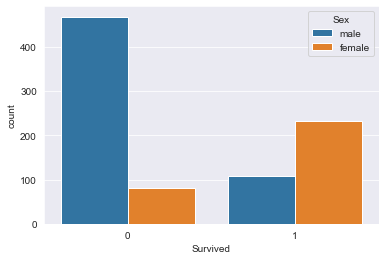

In [8]:
sns.set_style("darkgrid")
sns.countplot(x='Survived',data=df,hue='Sex')

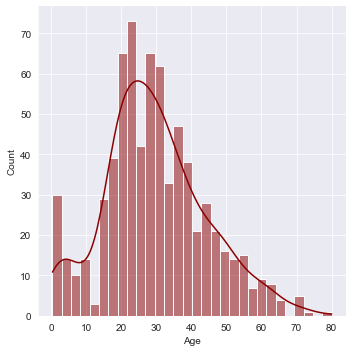

In [9]:
# now to look which age group died the most
sns.displot(df['Age'].dropna(),kde=True,color='darkred',bins=30)
# bins represents the segregation of x axis , more the bins number more seperated content you will see
# kde represnts basic pattern on the plot to get info about max and mins

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

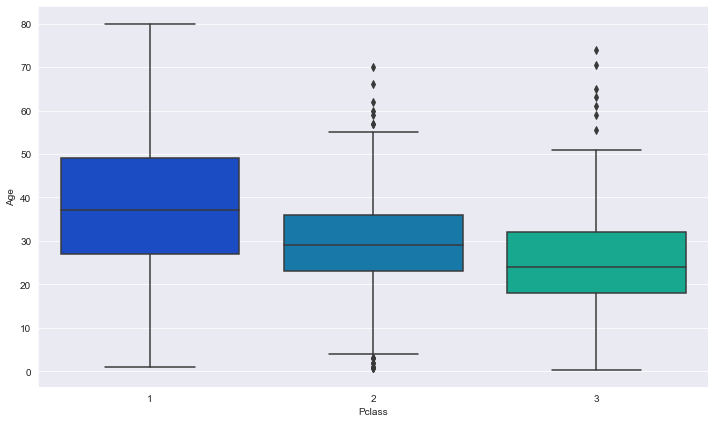

In [10]:
# now we will fill the null values in age column
# for that we have to find out avg values
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

so in pclass1 we have avg age as 37 pclass2 as 29 and pclass 3 as 24

In [11]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [12]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [13]:
df['Age'].isnull().sum()

0

<AxesSubplot:>

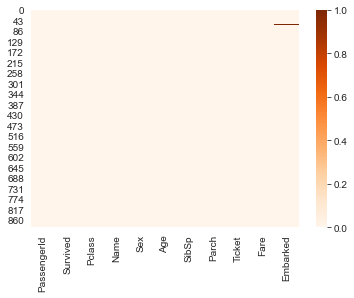

In [14]:
sns.heatmap(df.isnull(),cmap='Oranges')
# so now we can see that there's no null values in our dataset

In [15]:
# everytime before training model you have to first make sure model can read that 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


 here we can see that name,sex,ticket,embarked are not in int or float so we have to convert them so that model can read that


In [17]:
sex=pd.get_dummies(df["Sex"],drop_first=False)
embark=pd.get_dummies(df["Embarked"],drop_first=False)

In [27]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,...,female,male,C,Q,S,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,0,...,0,1,0,0,1,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,...,1,0,1,0,0,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,...,1,0,0,0,1,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,...,1,0,0,0,1,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,0,...,0,1,0,0,1,0,1,0,0,1


In [31]:
# this is used to drop duplicate columns in the data frame
# site link: https://sparkbyexamples.com/pandas/pandas-remove-duplicate-columns-from-dataframe/#:~:text=To%20drop%20duplicate%20columns%20from%20pandas%20DataFrame%20use%20df.,data%20regardless%20of%20column%20names.
df2 = df.T.drop_duplicates().T
df2.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S,female
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0,0.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0,1.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0,0.0


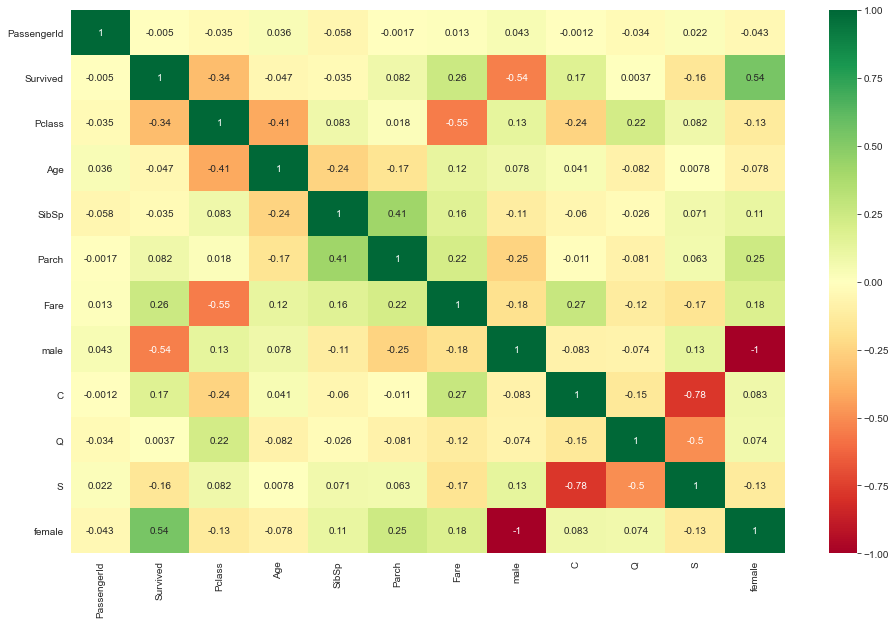

In [32]:
sns.heatmap(df2.corr(),annot=True,cmap="RdYlGn")
fig=plt.gcf()
fig.set_size_inches(16,10)
plt.show()

# training dataset

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df2.drop('Survived',axis=1),df2['Survived'],test_size=0.30,random_state=101)

In [34]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression(max_iter=1000)
logmodel.fit(x_train,y_train)

C:\Users\AKSHAT RAI LADDHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [35]:
predictions=logmodel.predict(x_test)

In [36]:
logmodel.score(x_test,y_test)

0.7835820895522388

so we got 78%accuracy on titanic model 
we can get more accuracy on this by implementing other models 